# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Connect to drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read data

In [3]:
df = pd.read_excel('/content/drive/MyDrive/DataSets/road_accident_data.xlsx')
df

,ID,State,Date,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,...,Num_Vehicles_Involved,Num_Casualties,Speed_Limit,Distance_to_Nearest_Hospital,Distance_to_Nearest_Police_Station,Visibility,Road_Width,Road_Surface_Friction_Coefficient,Vehicle_Speed,Time_Taken_for_Emergency_Response
0,165433,Connecticut,2024-02-20 05:46:20,Tuesday,19:59:02,Rainy,Muddy,Daylight,Street,T-Junction,...,2,3,57.0,3.303606,3.139351,485.649012,4.886202,0.904971,45.0,25.152781
1,165434,Massachusetts,2024-01-09 05:08:31,Wednesday,21:28:51,Sunny,Muddy,Daylight,Highway,Intersection,...,1,0,55.0,2.715327,3.634593,616.979936,4.677592,0.949236,41.0,23.163817
2,165435,Wyoming,2024-02-20 08:26:27,Thursday,18:04:26,Snowy,Snowy,Dawn,Street,Underpass,...,3,1,38.0,4.811429,9.631561,838.741654,9.926058,0.184447,64.0,6.697750
3,165436,Hawaii,2024-01-15 03:23:47,Sunday,16:51:02,Snowy,Icy,Daylight,Street,Intersection,...,5,0,59.0,6.976968,2.334468,842.441019,4.351822,0.195811,NaN,6.595036
4,165437,Oklahoma,2024-02-10 10:17:29,Tuesday,14:19:19,Foggy,Icy,Night,Rural,T-Junction,...,2,0,53.0,3.724599,4.359620,905.620263,6.626862,0.954821,81.0,22.913128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,167038,New Jersey,2024-01-16 08:39:47,Monday,05:40:02,Sunny,Snowy,Dusk,Rural,Overpass,...,3,0,NaN,5.526823,0.462281,313.519646,8.653699,0.814166,29.0,NaN
1606,167039,Wyoming,2024-01-24 21:39:23,Sunday,00:54:20,Rainy,Wet,Dawn,Freeway,Roundabout,...,4,0,37.0,0.794841,2.881738,657.264720,8.388508,0.311292,12.0,13.507650
1607,167040,New Mexico,2024-02-03 17:53:45,Sunday,19:15:52,Stormy,Wet,Dusk,Rural,Crossroads,...,2,2,70.0,6.716450,3.630358,590.511805,8.197109,0.469393,51.0,13.239562
1608,167041,Oklahoma,2024-01-25 18:16:24,Monday,02:12:24,NaN,Wet,Night,Freeway,Roundabout,...,1,0,31.0,8.396440,7.895523,492.994027,3.017950,0.397886,31.0,13.939866


# EDA

In [4]:
df.shape

(1610, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  1610 non-null   int64         
 1   State                               1610 non-null   object        
 2   Date                                1610 non-null   datetime64[ns]
 3   Day_of_Week                         1610 non-null   object        
 4   Time_of_Day                         1610 non-null   object        
 5   Weather_Conditions                  1461 non-null   object        
 6   Road_Conditions                     1610 non-null   object        
 7   Light_Conditions                    1610 non-null   object        
 8   Type_of_Road                        1610 non-null   object        
 9   Type_of_Junction                    1455 non-null   object        
 10  Type_of_Accident        

In [6]:
df.describe()

,ID,Date,Num_Vehicles_Involved,Num_Casualties,Speed_Limit,Distance_to_Nearest_Hospital,Distance_to_Nearest_Police_Station,Visibility,Road_Width,Road_Surface_Friction_Coefficient,Vehicle_Speed,Time_Taken_for_Emergency_Response
count,1610.000000,1610,1610.000000,1610.000000,1457.000000,1610.000000,1610.000000,1610.000000,1453.000000,1610.000000,1433.000000,1444.000000
mean,166237.500000,2024-01-30 19:29:33.383229440,3.062112,1.444099,50.144132,5.062241,5.049247,553.774075,6.537440,0.549663,49.933008,17.771576
min,165433.000000,2024-01-01 00:44:44,1.000000,0.000000,30.000000,0.113713,0.100520,100.224514,3.000363,0.100261,0.000000,5.032373
25%,165835.250000,2024-01-15 22:21:01.249999872,2.000000,0.000000,40.000000,2.549658,2.708608,327.701610,4.773072,0.315058,24.000000,11.501425
50%,166237.500000,2024-01-30 18:24:35.500000,3.000000,1.000000,50.000000,5.151083,4.977115,557.361549,6.623199,0.550753,49.000000,17.498544
75%,166639.750000,2024-02-14 17:17:31,4.000000,3.000000,60.000000,7.563470,7.474726,781.561590,8.284306,0.774580,76.000000,24.183088
max,167042.000000,2024-02-29 01:31:24,5.000000,3.000000,70.000000,9.999620,9.998113,999.931342,9.996583,0.999489,100.000000,29.981212
std,464.911282,NaN,1.412848,1.155813,11.869475,2.890145,2.800700,258.589644,2.011750,0.259722,29.279972,7.245455


In [7]:
df.describe(include=object)

,State,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,Type_of_Accident,Vehicle_Type,Driver_Age_Group
count,1610,1610,1610,1461,1610,1610,1610,1455,1610,1610,1610
unique,50,7,1597,5,5,4,5,6,7,5,4
top,Hawaii,Tuesday,20:20:06,Rainy,Dry,Dusk,Rural,Underpass,Cyclist involved,Truck,Adult
freq,47,252,2,313,336,415,336,255,246,352,420


In [9]:
# show nulls as a percentage
df.isnull().sum() / len(df) * 100

,0
ID,0.000000
State,0.000000
Date,0.000000
Day_of_Week,0.000000
Time_of_Day,0.000000
Weather_Conditions,9.254658
Road_Conditions,0.000000
Light_Conditions,0.000000
Type_of_Road,0.000000
Type_of_Junction,9.627329


In [12]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


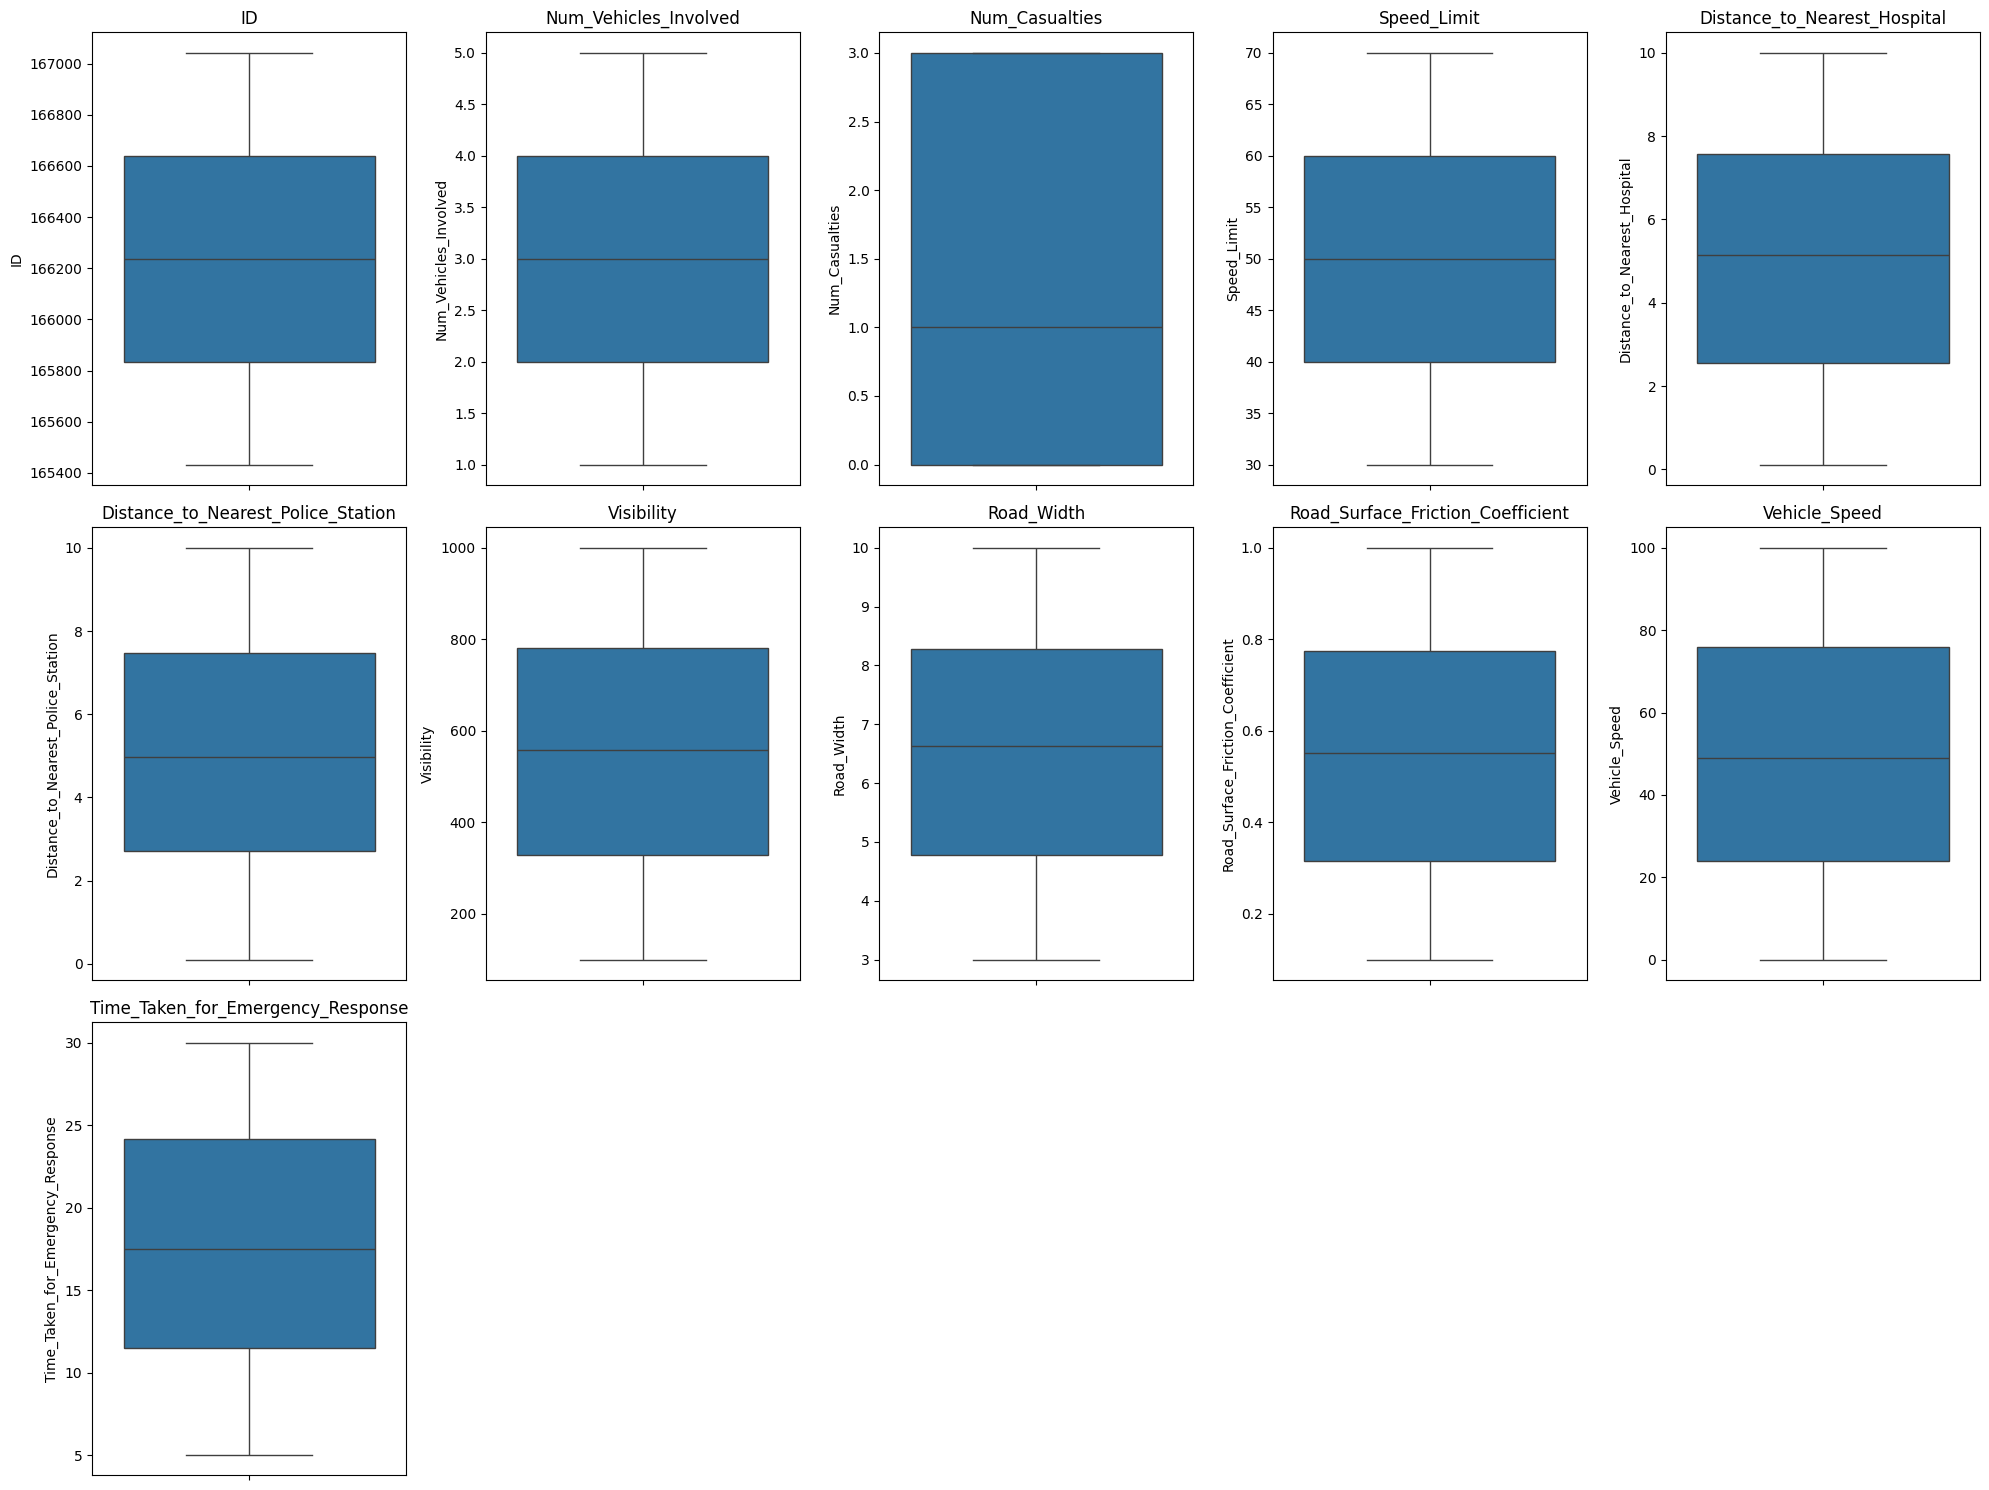

In [15]:
num_cols = df.select_dtypes(include=np.number).columns
n_cols = len(num_cols)
n_rows = (n_cols + 4) // 5  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, 5, figsize=(20, n_rows * 5))
axes = axes.flatten()

# Hide unused axes if any
for i in range(n_cols, len(axes)):
    fig.delaxes(axes[i])

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

# Data Cleaning


1.   Handle missing values
2.   No duplicates
3.   No outliers



In [22]:
Cleaned_df = df.copy()

remove time from date column

In [23]:
Cleaned_df['Date'] = pd.to_datetime(Cleaned_df['Date']).dt.date

## Missing Values


*   **Weather Condition:** Mode Imputation Based on "Road_Conditions" and "Light_Conditions"
*   **Type_of_Junction:** Mode Imputation Based on "Type_of_Road"
*   **Speed_Limit:** Median Imputation Based on "Type_of_Road" and "Vehicle_Type"
*   **Vehicle_Speed:** Mode Imputation
*   **Time_Taken_for_Emergency_Response:** Mean Imputation Using "Distance_to_Nearest_Hospital" and "Distance_to_Nearest_Police_Station"
*   **Road_Width:** Mode Imputation Using "Type_of_Rode" and "Type_of_Junction"




In [27]:
# 1. Weather_Conditions: Mode imputation based on Road_Conditions and Light_Conditions
weather_imputer = Cleaned_df.groupby(['Road_Conditions', 'Light_Conditions'])['Weather_Conditions'].apply(lambda x: x.mode()[0] if not x.mode().empty else Cleaned_df['Weather_Conditions'].mode()[0])
Cleaned_df['Weather_Conditions'] = Cleaned_df.apply(lambda row: weather_imputer[row['Road_Conditions'], row['Light_Conditions']] if pd.isna(row['Weather_Conditions']) else row['Weather_Conditions'], axis=1)

In [29]:
# 2. Type_of_Junction: Mode imputation based on Type_of_Road
junction_imputer = Cleaned_df.groupby('Type_of_Road')['Type_of_Junction'].apply(lambda x: x.mode()[0] if not x.mode().empty else Cleaned_df['Type_of_Junction'].mode()[0])
Cleaned_df['Type_of_Junction'] = Cleaned_df.apply(lambda row: junction_imputer[row['Type_of_Road']] if pd.isna(row['Type_of_Junction']) else row['Type_of_Junction'], axis=1)

In [31]:
# 3. Speed_Limit: Median imputation based on Type_of_Road and Vehicle_Type
speed_limit_imputer = Cleaned_df.groupby(['Type_of_Road', 'Vehicle_Type'])['Speed_Limit'].transform(lambda x: x.median() if not x.isnull().all() else Cleaned_df['Speed_Limit'].median())
Cleaned_df['Speed_Limit'] = Cleaned_df['Speed_Limit'].fillna(speed_limit_imputer).round()

In [33]:
# 4. Vehicle_Speed: Mode imputation based on Type_of_Road and Vehicle_Type
vehicle_speed_imputer = Cleaned_df.groupby(['Type_of_Road', 'Vehicle_Type'])['Vehicle_Speed'].apply(lambda x: x.mode()[0] if not x.mode().empty else Cleaned_df['Vehicle_Speed'].mode()[0])
Cleaned_df['Vehicle_Speed'] = Cleaned_df.apply(lambda row: vehicle_speed_imputer[row['Type_of_Road'], row['Vehicle_Type']] if pd.isna(row['Vehicle_Speed']) else row['Vehicle_Speed'], axis=1)

In [35]:
# 5. Time_Taken_for_Emergency_Response: Mean imputation using Distance_to_Nearest_Hospital and Distance_to_Nearest_Police_Station
# Create a group key based on distance ranges
Cleaned_df['Distance_Group'] = pd.qcut(df['Distance_to_Nearest_Hospital'].fillna(Cleaned_df['Distance_to_Nearest_Hospital'].mean()) + Cleaned_df['Distance_to_Nearest_Police_Station'].fillna(Cleaned_df['Distance_to_Nearest_Police_Station'].mean()), q=4, duplicates='drop')
response_time_imputer = Cleaned_df.groupby('Distance_Group')['Time_Taken_for_Emergency_Response'].transform('mean')
Cleaned_df['Time_Taken_for_Emergency_Response'] = Cleaned_df['Time_Taken_for_Emergency_Response'].fillna(response_time_imputer)

/tmp/ipython-input-35-1051624561.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_time_imputer = Cleaned_df.groupby('Distance_Group')['Time_Taken_for_Emergency_Response'].transform('mean')


In [37]:
# 6. Road_Width: Mode imputation based on Type_of_Road and Type_of_Junction
road_width_imputer = Cleaned_df.groupby(['Type_of_Road', 'Type_of_Junction'])['Road_Width'].apply(lambda x: x.mode()[0] if not x.mode().empty else Cleaned_df['Road_Width'].mode()[0])
Cleaned_df['Road_Width'] = Cleaned_df.apply(lambda row: road_width_imputer[row['Type_of_Road'], row['Type_of_Junction']] if pd.isna(row['Road_Width']) else row['Road_Width'], axis=1)

In [38]:
Cleaned_df.isnull().sum()

,0
ID,0
State,0
Date,0
Day_of_Week,0
Time_of_Day,0
Weather_Conditions,0
Road_Conditions,0
Light_Conditions,0
Type_of_Road,0
Type_of_Junction,0


# Save Updated data to csv

In [39]:
Cleaned_df.to_csv('/content/drive/MyDrive/DataSets/cleaned_road_accident_data.csv', index=False)